<a href="https://colab.research.google.com/github/amosngjj/Machine-Learning-with-Data-Analysis/blob/main/CA2_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiajieng174","key":"9a3ece7c297232fff35eee4c6d2dcb07"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           6539        206  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35           1039         38  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           5065        125  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [8]:
!kaggle datasets download -d gpiosenka/balls-image-classification

 96% 188M/196M [00:02<00:00, 89.3MB/s]
100% 196M/196M [00:02<00:00, 82.0MB/s]


In [9]:
!unzip balls-image-classification.zip

Archive:  balls-image-classification.zip
  inflating: balls-30-(200 X 200)-98.65.h5  
  inflating: balls.csv               
  inflating: test/baseball/1.jpg     
  inflating: test/baseball/2.jpg     
  inflating: test/baseball/3.jpg     
  inflating: test/baseball/4.jpg     
  inflating: test/baseball/5.jpg     
  inflating: test/basketball/1.jpg   
  inflating: test/basketball/2.jpg   
  inflating: test/basketball/3.jpg   
  inflating: test/basketball/4.jpg   
  inflating: test/basketball/5.jpg   
  inflating: test/beachballs/1.jpg   
  inflating: test/beachballs/2.jpg   
  inflating: test/beachballs/3.jpg   
  inflating: test/beachballs/4.jpg   
  inflating: test/beachballs/5.jpg   
  inflating: test/billiard ball/1.jpg  
  inflating: test/billiard ball/2.jpg  
  inflating: test/billiard ball/3.jpg  
  inflating: test/billiard ball/4.jpg  
  inflating: test/billiard ball/5.jpg  
  inflating: test/bowling ball/1.jpg  
  inflating: test/bowling ball/2.jpg  
  inflating: test/bowling ba

In [10]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sn
import cv2

import glob
import os

In [11]:
base_path = "/content"

train_dir = "/content/train"
test_dir = "/content/test"
val_dir = "/content/valid"

In [12]:
df = pd.read_csv("/content/balls.csv")

DATA VISUALISATION

In [13]:
print(f"Total number of imgaes -- > {len(df)}")

Total number of imgaes -- > 3915


In [14]:
data_count = df['data set'].value_counts()

In [15]:
print(f"Number of training images --> {data_count[0]}")
print(f"Number of testing images --> {data_count[1]}")
print(f"Number of validation images --> {data_count[2]}")

Number of training images --> 3615
Number of testing images --> 150
Number of validation images --> 150


In [16]:
ball_classes = os.listdir(train_dir)

In [17]:
len(ball_classes)

30

There are 30 classes of balls in this dataset.

In [18]:
train_images = glob.glob(f"{train_dir}/*/*.jpg")
test_images = glob.glob(f"{test_dir}/*/*.jpg")
val_images = glob.glob(f"{val_dir}/*/*.jpg")

In [19]:
cd = {}
for clas in ball_classes:
    num_items = len(os.listdir(os.path.join(train_dir, clas)))
    cd[clas] = num_items

In [20]:
cd

{'pokeman balls': 86,
 'soccer ball': 167,
 'billiard ball': 143,
 'sepak takraw ball': 141,
 'basketball': 116,
 'football': 112,
 'chrochet ball': 128,
 'cricket ball': 150,
 'paint balls': 32,
 'puffballs': 106,
 'rubberband ball': 134,
 'baseball': 112,
 'golf ball': 106,
 'cannon ball': 183,
 'crystal ball': 161,
 'eyeballs': 139,
 'volley ball': 131,
 'screwballs': 140,
 'buckeyballs': 82,
 'marble': 131,
 'beachballs': 92,
 'water polo ball': 139,
 'meat ball': 137,
 'medicine ball': 77,
 'bowling ball': 145,
 'tennis ball': 139,
 'wiffle ball': 99,
 'tether ball': 105,
 'wrecking ball': 69,
 'brass': 113}

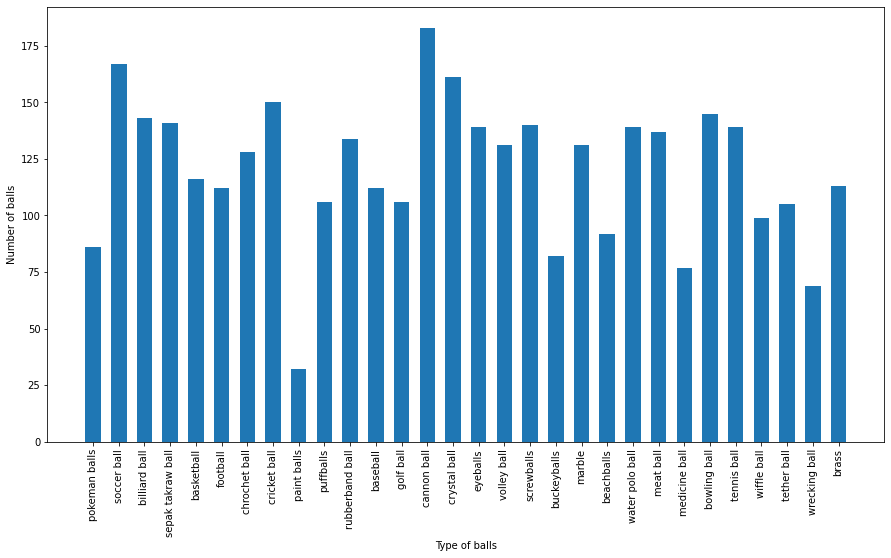

In [21]:
plt.figure(figsize=(15,8))
plt.bar(list(cd.keys()), list(cd.values()), width=0.6,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Type of balls")
plt.ylabel("Number of balls")
plt.show()

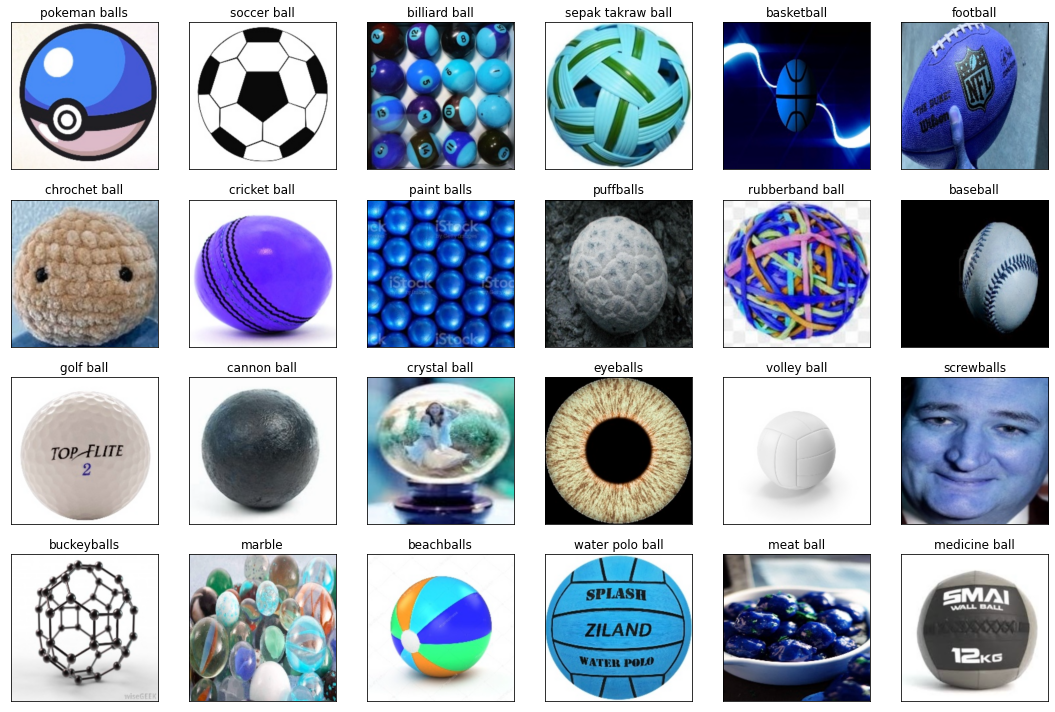

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i,ax in enumerate(axes.flat):
    images = os.listdir(os.path.join(train_dir, ball_classes[i]))
    img = cv2.imread(os.path.join(train_dir, ball_classes[i], images[i]))
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title(ball_classes[i])
fig.tight_layout()    
plt.show()

In [23]:
batch_size = 32
img_height = 160
img_width = 160

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3615 files belonging to 30 classes.


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 30 classes.


In [26]:
class_names = train_ds.class_names
print(class_names)

['baseball', 'basketball', 'beachballs', 'billiard ball', 'bowling ball', 'brass', 'buckeyballs', 'cannon ball', 'chrochet ball', 'cricket ball', 'crystal ball', 'eyeballs', 'football', 'golf ball', 'marble', 'meat ball', 'medicine ball', 'paint balls', 'pokeman balls', 'puffballs', 'rubberband ball', 'screwballs', 'sepak takraw ball', 'soccer ball', 'tennis ball', 'tether ball', 'volley ball', 'water polo ball', 'wiffle ball', 'wrecking ball']


In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 160, 160, 3)
(32,)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)

In [30]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


0.0 1.0


In [31]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
     

Epoch 1/10
113/113 [==============================] - 101s 868ms/step - loss: 2.9556 - accuracy: 0.2053 - val_loss: 2.2995 - val_accuracy: 0.3733
Epoch 2/10
113/113 [==============================] - 96s 847ms/step - loss: 1.7661 - accuracy: 0.5223 - val_loss: 1.6135 - val_accuracy: 0.5533
Epoch 3/10
113/113 [==============================] - 95s 839ms/step - loss: 1.0708 - accuracy: 0.6938 - val_loss: 1.4832 - val_accuracy: 0.5733
Epoch 4/10
113/113 [==============================] - 100s 884ms/step - loss: 0.6272 - accuracy: 0.8219 - val_loss: 1.2149 - val_accuracy: 0.6000
Epoch 5/10
113/113 [==============================] - 103s 916ms/step - loss: 0.3805 - accuracy: 0.8929 - val_loss: 1.3596 - val_accuracy: 0.7133
Epoch 6/10
113/113 [==============================] - 96s 851ms/step - loss: 0.2071 - accuracy: 0.9408 - val_loss: 1.3201 - val_accuracy: 0.7000
Epoch 7/10
113/113 [==============================] - 97s 858ms/step - loss: 0.1319 - accuracy: 0.9649 - val_loss: 1.6606 - val

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 40% accuracy on the validation set.

####DATA AUGMENTATION

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### DROPOUT

Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Visualise result after data augmentation and dropout

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 The model now achieved around 62% accuracy on the validation set which has a slight improvement that 58%.

Use the model to classify an image that wasn't included in the training or validation sets.

In [ ]:
## Get image from test data set
path = '/content/train/billiard ball/001.jpg'
# img = load_img(path, color_mode = "rgb", target_size=(150, 150))  #h, w
# img = np.array(img, dtype = 'float32')
# img = preprocess_input(img)
# plt.imshow(img)
# img = img.reshape(1,150,150,3)


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(img)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

USE TRANSFER LEARNING MODELS

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_dataset = test_ds.prefetch(buffer_size=AUTOTUNE)
test_dataset = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
BATCH_SIZE = 32
IMG_SIZE = (180, 180)

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

In [ ]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
len(model.trainable_variables)

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

FINE TUNING 

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)



In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)


In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']



In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)